In [49]:
import numpy as np             
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
train_path = '/content/drive/MyDrive/Best_Data/Train'
test_path = '/content/drive/MyDrive/Best_Data/Test'
valid_path = '/content/drive/MyDrive/Best_Data/Validation'

batch_size = 32

img_height = 224
img_width = 224

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
                        rescale = 1./255,
                        shear_range = 0.2,
                        zoom_range = 0.2,
                        horizontal_flip = True
                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [53]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )

test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False, 
      class_mode='binary',
      batch_size=batch_size
      )

valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 5607 images belonging to 2 classes.
Found 701 images belonging to 2 classes.
Found 701 images belonging to 2 classes.


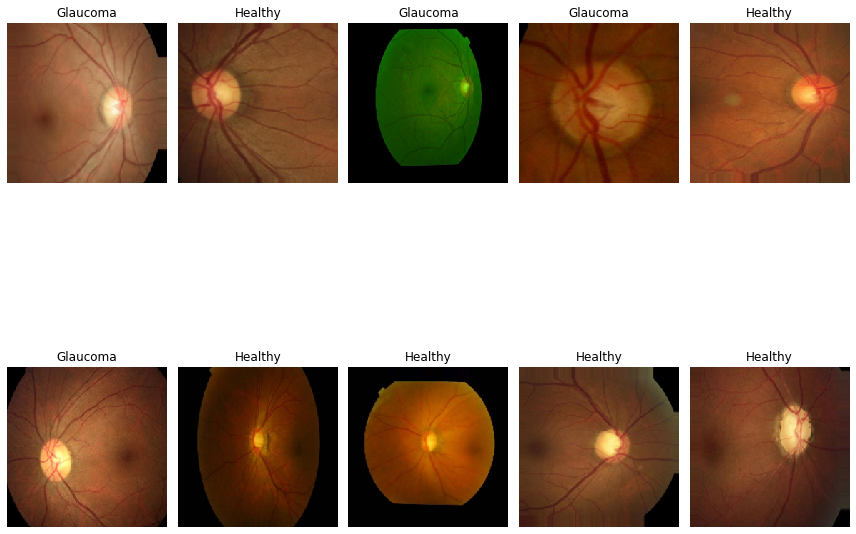

In [54]:
plt.figure(figsize=(12, 12))

for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'Healthy', 1:'Glaucoma'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
        
plt.tight_layout()
plt.show()

In [55]:
import keras
from keras import models
from keras import layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Dropout, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D

In [56]:
model = tf.keras.Sequential([
    layers.Conv2D(16, (3,3), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
 
    layers.Conv2D(128, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(1,1)),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation = 'sigmoid')
])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 112, 112, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                      

In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint("Net007.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [60]:
history = model.fit(train,validation_data=valid, epochs =30, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])

Epoch 1/30
176/176 [==============================] - ETA: 0s - loss: 0.4589 - accuracy: 0.7878
Epoch 1: val_accuracy improved from -inf to 0.46362, saving model to Net007.h5
176/176 [==============================] - 104s 587ms/step - loss: 0.4589 - accuracy: 0.7878 - val_loss: 0.8444 - val_accuracy: 0.4636 - lr: 0.0010
Epoch 2/30
176/176 [==============================] - ETA: 0s - loss: 0.3104 - accuracy: 0.8686
Epoch 2: val_accuracy improved from 0.46362 to 0.73752, saving model to Net007.h5
176/176 [==============================] - 102s 578ms/step - loss: 0.3104 - accuracy: 0.8686 - val_loss: 0.5802 - val_accuracy: 0.7375 - lr: 0.0010
Epoch 3/30
176/176 [==============================] - ETA: 0s - loss: 0.2718 - accuracy: 0.8862
Epoch 3: val_accuracy improved from 0.73752 to 0.86876, saving model to Net007.h5
176/176 [==============================] - 102s 581ms/step - loss: 0.2718 - accuracy: 0.8862 - val_loss: 0.3518 - val_accuracy: 0.8688 - lr: 0.0010
Epoch 4/30
176/176 [=====

In [61]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

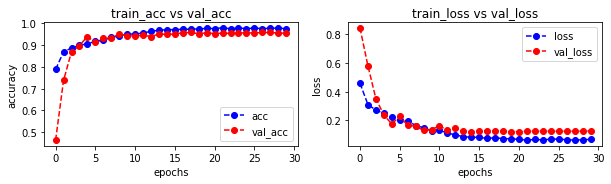

In [62]:
plot_accuracy_loss(history)

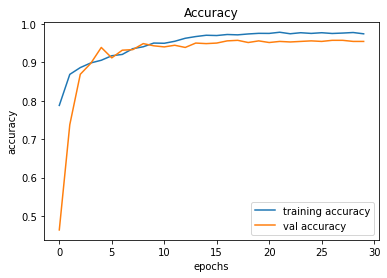

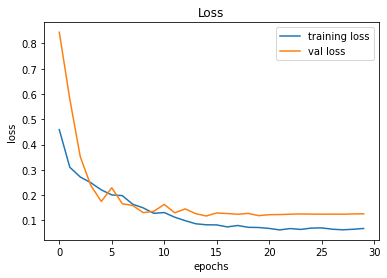

In [63]:
import matplotlib.pyplot as plt
#Display of the accuracy and the loss values
plt.figure(0)
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [64]:
test_accu_CNN = model.evaluate(test)
print('The testing accuracy is :',test_accu_CNN[1]*100, '%')

22/22 [==============================] - 5s 230ms/step - loss: 0.1163 - accuracy: 0.9700
The testing accuracy is : 97.00428247451782 %


In [65]:
preds = model.predict(test,verbose=1)

22/22 [==============================] - 5s 227ms/step


In [66]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

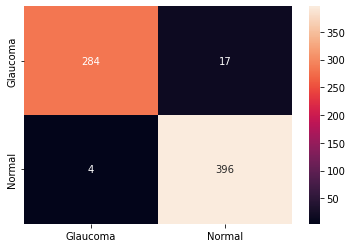

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Glaucoma", "Normal"],
columns=["Glaucoma", "Normal"])
sns.heatmap(cm,annot=True,fmt="d")

In [68]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['Glaucoma','Normal']))

              precision    recall  f1-score   support

    Glaucoma       0.99      0.94      0.96       301
      Normal       0.96      0.99      0.97       400

    accuracy                           0.97       701
   macro avg       0.97      0.97      0.97       701
weighted avg       0.97      0.97      0.97       701



(701, 224, 224, 3)
(701,)


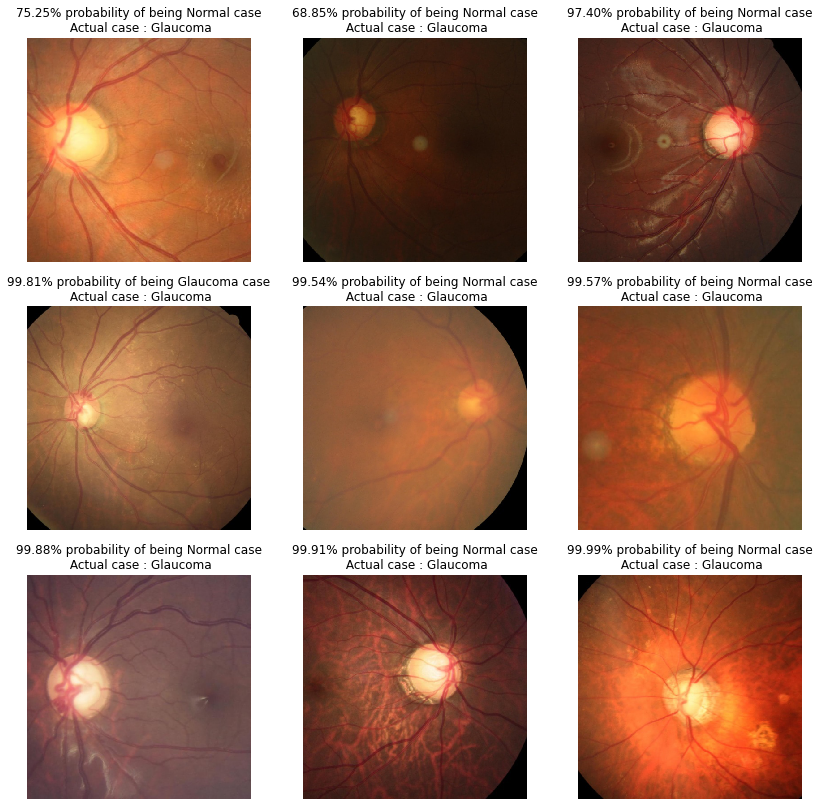

In [69]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'Glaucoma', 1:'Normal'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Glaucoma case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, roc_curve, auc,roc_auc_score

print('Accuracy: %.4f' % accuracy_score(test.classes, predictions), 'Precision: %.4f' % precision_score(test.classes, predictions),' Recall: %.4f' % recall_score(test.classes, predictions), 
      'F1 Score: %.4f' % f1_score(test.classes, predictions), 'AUC Score: %.4f' % roc_auc_score(test.classes, predictions))

Accuracy: 0.9700 Precision: 0.9588  Recall: 0.9900 F1 Score: 0.9742 AUC Score: 0.9668


In [74]:
from sklearn import metrics
recall_sensitivity = metrics.recall_score(test.classes, predictions, pos_label=1)
recall_specificity = metrics.recall_score(test.classes, predictions, pos_label=0)
recall_sensitivity, recall_specificity 

(0.99, 0.9435215946843853)

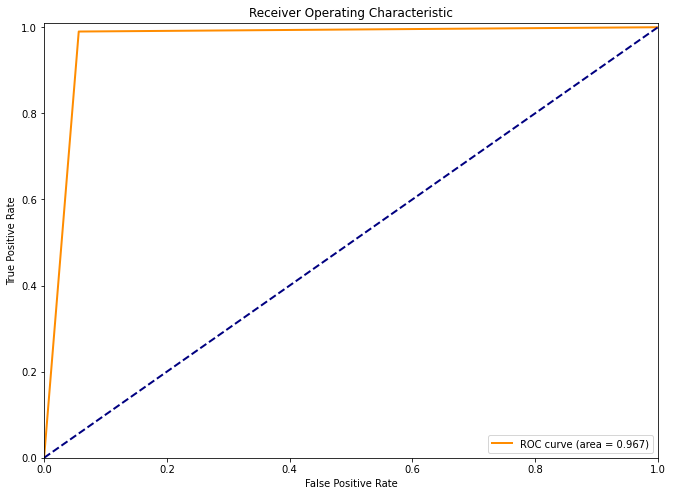

In [75]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class

num_classes = 0

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(test.classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(11,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', 
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc2.png')